In [1]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image
import random

In [15]:
class AgentState(TypedDict):
    name: str
    guesses: List[int]
    attempts: int
    lower_bound: int
    upper_bound: int
    target: int



In [16]:
def greet(state: AgentState) -> AgentState:
    """    A node that greets the user by name and initializes the counter.
    """
    state['name'] = f"Hello {state['name']}!"
    state['attempts'] = 0
    
    return state

def set_target(state: AgentState) -> AgentState:
    """A node that generates a random number and sets the bounds for guessing."""
    state['guesses'] = []
    state['lower_bound'] = 1
    state['upper_bound'] = 20
    state['target'] = random.randint(state['lower_bound'], state['upper_bound'])
    print(f"{state['name']}, I have selected a number between {state['lower_bound']} and {state['upper_bound']}. It's {state['target']}!, now I am going to guess it.")
    
    return state

def check_guess(state: AgentState) -> AgentState:
    """A node that checks the guess against the generated number."""
    guess = state['guesses'][-1] 
    if guess < state['target']:
        print(f"My guess was Too low! guess was {guess} but the target is {state['target']}")
        state['lower_bound'] = guess + 1
        return 'loop'
    elif guess > state['target']:
        print(f"My guess was Too high! guess was {guess} but the target is {state['target']}")
        state['upper_bound'] = guess - 1
        return 'loop'
    else:
        print(f"Congratulations {state['name']}! You've guessed the number {state['target']} correctly!")
        return 'exit'
    
    return state

def make_guess(state: AgentState) -> AgentState:
    """A node that prompts the user to make a guess."""
    if state['attempts'] <= 7:
        guess = random.randint(state['lower_bound'], state['upper_bound'])
        state['guesses'].append(guess)
        state['attempts'] += 1
        return state
    else:
        print("Sorry, I've used all my attempts!")
        return 'exit'



In [17]:
graph = StateGraph(AgentState)

graph.add_node('greet', greet)
graph.add_node('set_target', set_target)
graph.add_node('make_guess', make_guess)

graph.add_conditional_edges(
    'make_guess',
    check_guess,
    {
        'loop': 'make_guess',
        'exit': END
    }
)

graph.add_edge(START, 'greet')
graph.add_edge('greet', 'set_target')
graph.add_edge('set_target', 'make_guess')

app = graph.compile()


  

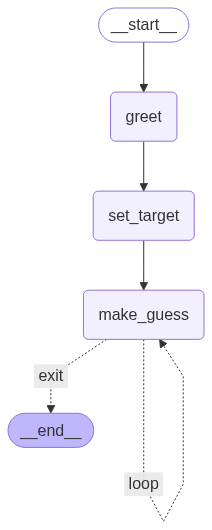

In [18]:
display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
app.invoke({"name": "Donald", "guesses": [], "attempts": 0, "lower_bound": 1, "upper_bound": 20})

Hello Donald!, I have selected a number between 1 and 20. It's 14!, now I am going to guess it.
My guess was Too low! guess was 6 but the target is 14
My guess was Too low! guess was 13 but the target is 14
My guess was Too low! guess was 12 but the target is 14
My guess was Too low! guess was 11 but the target is 14
My guess was Too low! guess was 5 but the target is 14
My guess was Too low! guess was 4 but the target is 14
My guess was Too low! guess was 6 but the target is 14
My guess was Too low! guess was 7 but the target is 14
Sorry, I've used all my attempts!


InvalidUpdateError: Expected dict, got exit
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_GRAPH_NODE_RETURN_VALUE